# (1) Numerically solve the following system of equations

$x_{1} - 2x_{2} + 9x_{3} + 13x_{4} = 1\\
-5x_{1} + x_{2} +6x_{3} - 7x_{4} = -3\\
4x_{1} + 8x_{2} - 4x_{3} - 2x_{4} = -2\\
8x_{1} + 5x_{2} - 7x_{3} + x_{4} = 5$

In [12]:
import numpy as np
import scipy.linalg

A = np.array([[1, -2, 9, 13], [-5, 1, 6, -7], [4, 8, -4, -2], [8, 5, -7, 1]])
b = np.array([1, -3, -2, 5])

solv1 = scipy.linalg.solve(A, b)
print(solv1)

#-------------------

invA = scipy.linalg.inv(A)
solv2 = np.dot(invA, b)
print(solv2)



[ 1.76839237 -1.02724796  0.49318801 -0.55858311]
[ 1.76839237 -1.02724796  0.49318801 -0.55858311]


# (2) Numerically integrate the following integrals and compare the results to the exact value of each one.

$\int_{-1}^{1}\frac{dx}{1 + x^2}= \frac{\pi}{2}\\
\int_{-\infty}^{\infty}\frac{dx}{(e^{x} + x + 1)^2 + \pi^2} = \frac{2}{3}$

In [8]:
import numpy as np
from scipy.integrate import quad


#First integral
f = lambda x: 1./(1 + x**2)

i = quad(f, -1., 1.0)
print(i)


#Second integral

g = lambda x: 1./((np.exp(x) + x + 1)**2 + (np.pi)**2)

l = quad(g, -np.inf, np.inf)
print(l)

(1.5707963267948968, 1.7439342485646153e-14)
(0.6666666666666667, 6.918648089738248e-12)


/Users/sebastianquinteroarias/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/Users/sebastianquinteroarias/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


# (3) Use $scipy.integrate.odeint$ to solve the following set of nonlinear ODEs.


$\frac{dx}{dt} = a(y - x)\\
\frac{dy}{dt} = (c - a)x - xz + cy\\
\frac{dz}{dt} = xy - bz$

# For the initial conditions, use $x_{0} = −10$, $y_{0} = 0$, $z_{0} = 35$. Setting the initial parameters to $a = 40$, $b = 5$, $c = 35$ gives chaotic solutions like those shown below. Setting $b = 10$ while keeping $a = 40$ and $c = 35$ yields periodic solutions. Take care to choose a small enough time step 

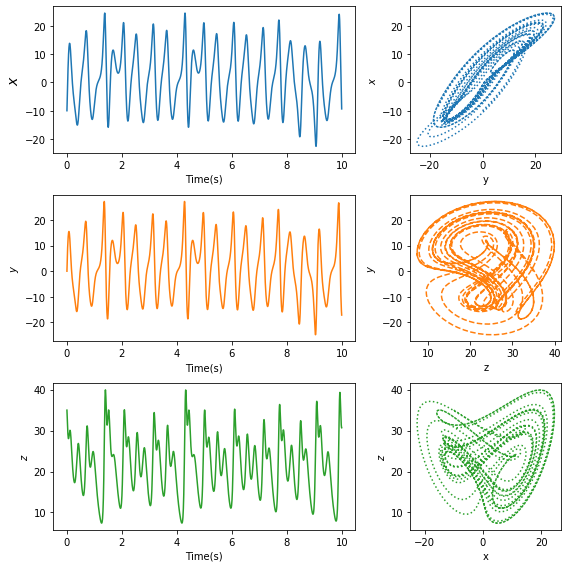

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


#Definition of the function
def f(X, t, params):
    x, y, z = X
    a, b, c = params
    derivs = [a*(y - x), (c - a)*x - x*z + c*y, x*y - b*z ]
    return derivs


#Initial conditions
x0 = -10.0
y0 = 0.0
z0 = 35.0

#Parameters
a0 = 40.0
b0 = 5.0
c0 = 30.0

#Arrays
params = [a0, b0, c0]
X0 = [x0, y0, z0]

#Time interval
tStop = 10.
tInc = 0.005
t = np.arange(0., tStop, tInc)

#Solution of the function
sol = odeint(f, X0, t, args=(params,))
x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 2]

#Plot the solutions
fig, ax = plt.subplots(3, 2, figsize=(8, 8),
                       gridspec_kw={'width_ratios': [2, 1]})


ax[0,0].plot(t, x, color='C0')
ax[0,0].set_xlabel('Time(s)')
ax[0,0].set_ylabel(r'$x$', fontsize=14)


ax[1,0].plot(t, y, color='C1')
ax[1,0].set_xlabel('Time(s)')
ax[1,0].set_ylabel(r'$y$')

ax[2,0].plot(t, z, color='C2')
ax[2,0].set_xlabel('Time(s)')
ax[2,0].set_ylabel(r'$z$')


ax[0,1].plot(y, x, linestyle=':', color='C0')
ax[0,1].set_xlabel('y')
ax[0,1].set_ylabel(r'$x$')

ax[1,1].plot(z, y, linestyle='--', color='C1')
ax[1,1].set_xlabel('z')
ax[1,1].set_ylabel(r'$y$')

ax[2,1].plot(x, z, linestyle=':',color='C2')
ax[2,1].set_xlabel('x')
ax[2,1].set_ylabel(r'$z$')


plt.tight_layout()


# (4) In this exercise, you explore the use of discrete Fourier transforms to filter noisy signals. As a first step, use the following function to create a noisy Gaussian waveform:


## (a) Calculate the discrete Fourier transform using NumPy’s $fft$ and $fftshift$ routines so that you have a properly ordered Fourier transform.

## (b) Plot the noisy Gaussian and its DFT on two separate panes in the same figure window. Set the limits of the y-axis of the DFT plot so that you can see the noise at the high frequencies (limits of $\pm2$ should suffice).


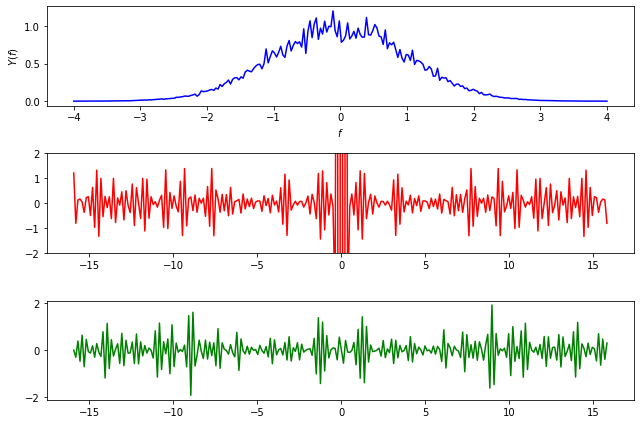

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

def gaussNoisy(x, noiseAmp):
    noise = noiseAmp*(np.random.randn(len(x))) 
    return np.exp(-0.5*x*x) * (1.0+noise)

N = 256
x = np.linspace(-4.0, 4.0, N)
y = gaussNoisy(x, 0.1)
dx = x[1]-x[0]

Y = fftpack.fft(y)
f = fftpack.fftfreq(y.size, d=dx)
f = fftpack.fftshift(f)
Y = fftpack.fftshift(Y)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 6))

#Plot the transformations
ax1.plot(x, y, color='blue', label='Noise')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y(x)$')


ax2.plot(f, np.real(Y), color='red', label='Real part')
ax2.set_ylim(-2., 2.)
ax1.set_xlabel('$f$')
ax1.set_ylabel('$Y(f)$')

ax3.plot(f, np.imag(Y), color='green', label='Imaginary part')



plt.tight_layout()


# (5) Use $\textit{special.eval_chebyt}$ function to plot the following functions: NumPy’s polyval function together with SciPy or SciPy’s

## (a) The first four Chebyshev polynomials of the first kind over the interval from $−1$ to $+1$. Look up $\textit{scipy.special.chebyt}$ on the SciPy web site.

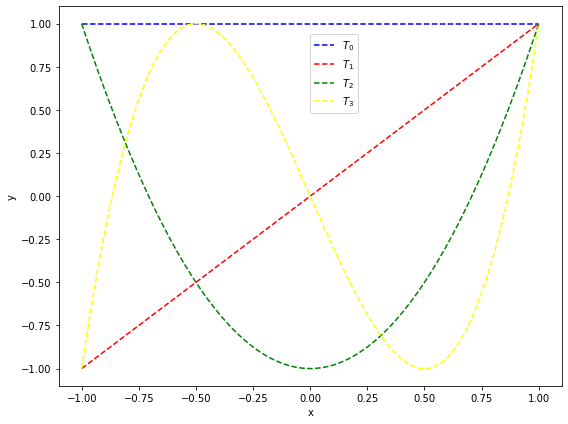

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special


fig, ax = plt.subplots(figsize=(8,6))


#Chebyshev Polynomials

x = np.linspace(-1., 1., 200)
ch0 = scipy.special.eval_chebyt(0, x)
ch1 = scipy.special.eval_chebyt(1, x)
ch2 = scipy.special.eval_chebyt(2, x)
ch3 = scipy.special.eval_chebyt(3, x)



ax.plot(x, ch0, ls='--', color='blue', label='$T_{0}$')
ax.plot(x, ch1, ls = '--', color='red', label='$T_{1}$' )
ax.plot(x, ch2, ls = '--', color='green', label='$T_{2}$' )
ax.plot(x, ch3, ls = '--', color='yellow', label='$T_{3}$')
ax.legend(loc=(0.5, 0.72))
ax.set_xlabel('x')
ax.set_ylabel('y')


fig.tight_layout()



# (b) The first four Hermite polynomials $multiplied$ by


$\frac{e^{-x^2/2}}{(2^{n}n!\sqrt{\pi})^{1/2}}$

# Plot these on the interval from $−5$ to $+5$. They are the first four wave functions of the quantum mechanical simple harmonic oscillator.

Text(0.5, 1.0, 'Quantum Mechanical Simple Harmonic Oscillator')

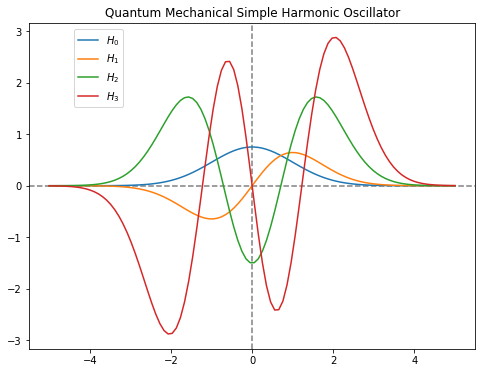

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.special import factorial


def factor(n, x):
    f = np.exp(-x**2/2)/np.sqrt(((2**n)*scipy.special.factorial(n)*np.sqrt(np.pi)))
    return f

fig, ax = plt.subplots(figsize=(8, 6))


x = np.linspace(-5., 5., 100)

h0 = scipy.special.eval_hermite(0, x)
H0 = factor(0, x)*h0

h1 = scipy.special.eval_hermite(1, x)
H1 = factor(1, x)*h1

h2 = scipy.special.eval_hermite(2, x)
H2 = factor(0, x)*h2

h3 = scipy.special.eval_hermite(3, x)
H3 = factor(1, x)*h3





ax.plot(x, H0, label='$H_{0}$')
ax.plot(x, H1, label='$H_{1}$')
ax.plot(x, H2, label='$H_{2}$')
ax.plot(x, H3, label='$H_{3}$')
ax.axvline(ls='--', color='gray', zorder=-1)
ax.axhline(ls='--', color='gray', zorder=-1)

ax.legend(loc=(0.1, 0.74))

ax.set_title('Quantum Mechanical Simple Harmonic Oscillator')


